In [151]:
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
df = pd.read_csv('reviews.csv')
print(df.columns.tolist())
print(df.head(1))

['Business_name', 'Username', 'Review Date', 'Visit Date', 'Review Title', 'Review Text', 'Rating']
                 Business_name             Username   Review Date Visit Date   
0  Albeta Mediterranean Bakery  Traveler32528783809  June 2, 2023  June 2023  \

         Review Title                                        Review Text   
0  Highly recommended  Top quality products, exceptional customer ser...  \

   Rating  
0     5.0  


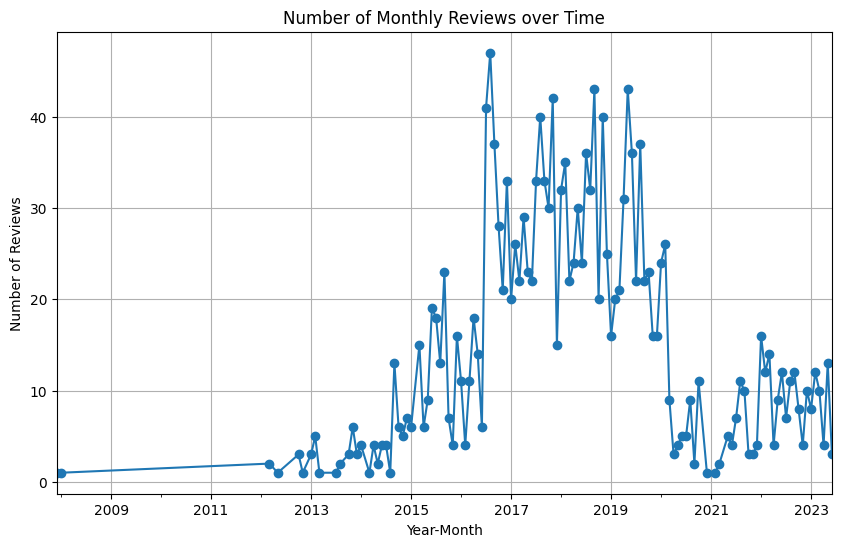

In [153]:
#Convert review date into datetime
df['Review Date'] = pd.to_datetime(df['Review Date'])

#Retrieve the Month of the review date
df['Year-Month'] = df['Review Date'].dt.to_period('M')

#Group df by year and month
monthly_reviews = df.groupby('Year-Month').size()

# Plot the monthly reviews over the years
plt.figure(figsize=(10, 6))
monthly_reviews.plot(kind='line', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Monthly Reviews over Time')
plt.grid(True)
plt.show()

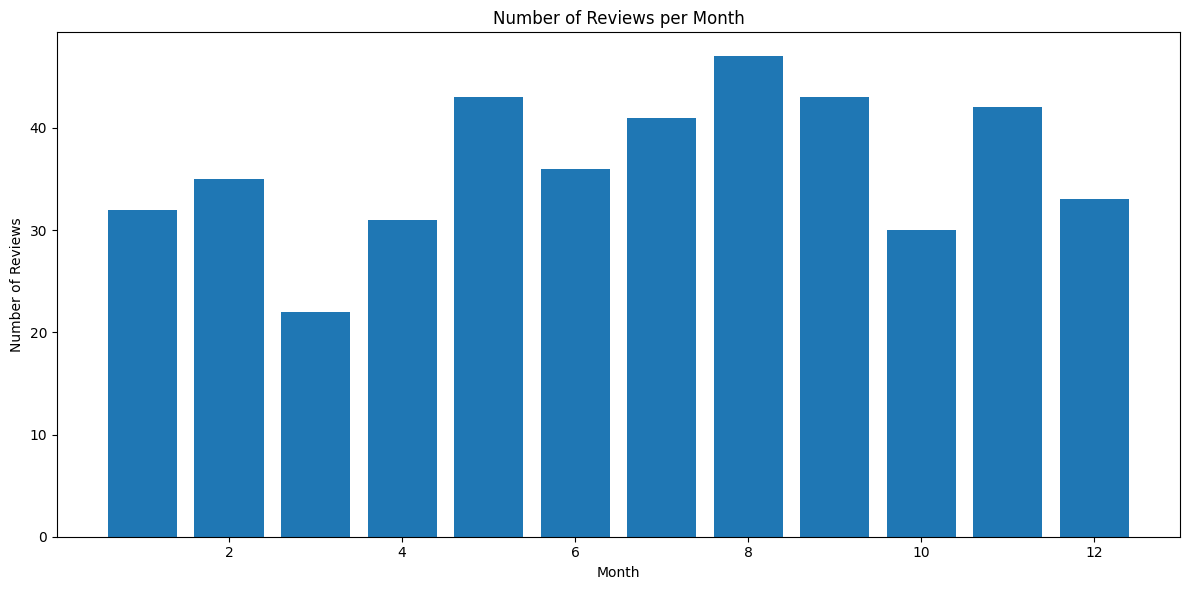

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with 'Year', 'Month', and 'Review Date' columns

# Group reviews by year and month and count the number of reviews in each month
monthly_reviews = df.groupby(['Year', 'Month']).count()['Review Date']

# Convert the grouped data to a DataFrame
monthly_reviews_df = monthly_reviews.reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(monthly_reviews_df['Month'], monthly_reviews_df['Review Date'])
ax.set_xlabel('Month')
ax.set_ylabel('Number of Reviews')
ax.set_title('Number of Reviews per Month')

plt.tight_layout()
plt.show()


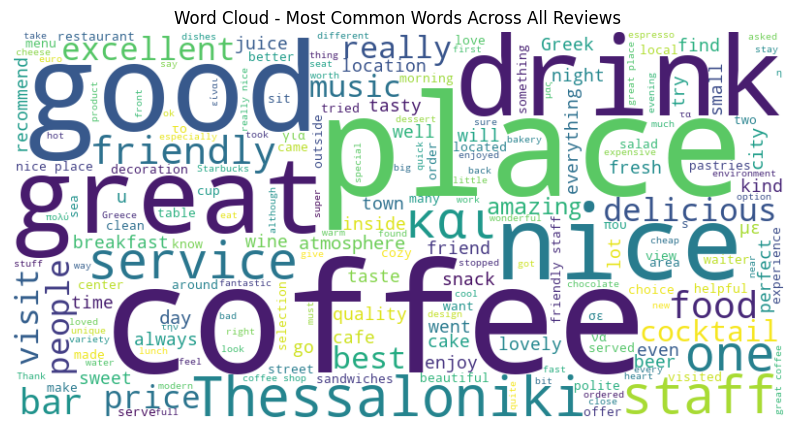

In [154]:
# Most common words across all reviews
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 1))
word_counts = count_vectorizer.fit_transform([all_reviews_text])
common_words = count_vectorizer.get_feature_names_out()
word_counts = word_counts.toarray().squeeze()

# Word cloud for most common words across all reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common Words Across All Reviews')
plt.show()

In [155]:
def makePlot(dict, title):
    # Generate word cloud for bigrams
    wordcloud_bigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_bigrams, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

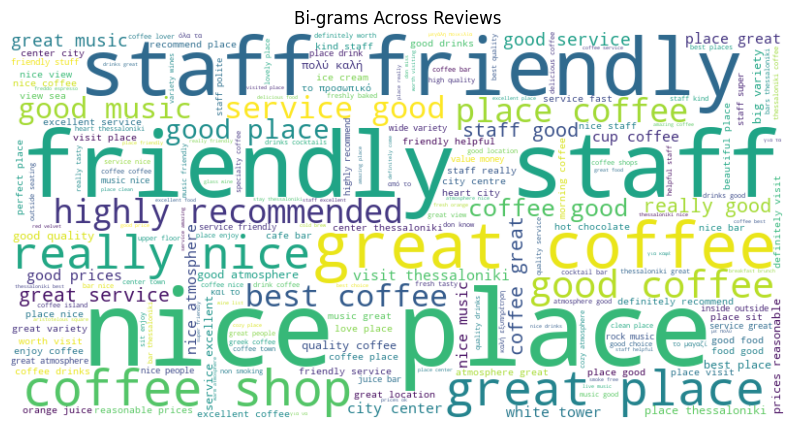

In [156]:
# Retrieve bi-grams frequency
biagram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))
bigram_counts = biagram_vectorizer.fit_transform([all_reviews_text])
biagrams_words = biagram_vectorizer.get_feature_names_out()
bigram_counts = bigram_counts.toarray().squeeze()

# Create a dictionary consisting of a pair (bi-gram, frequency)
bigram_freq_dict = {}
for bigram, count in zip(biagrams_words, bigram_counts):
    bigram_text = ' '.join(bigram.split('_'))
    bigram_freq_dict[bigram_text] = count

makePlot(bigram_freq_dict, 'Bi-grams Across Reviews')

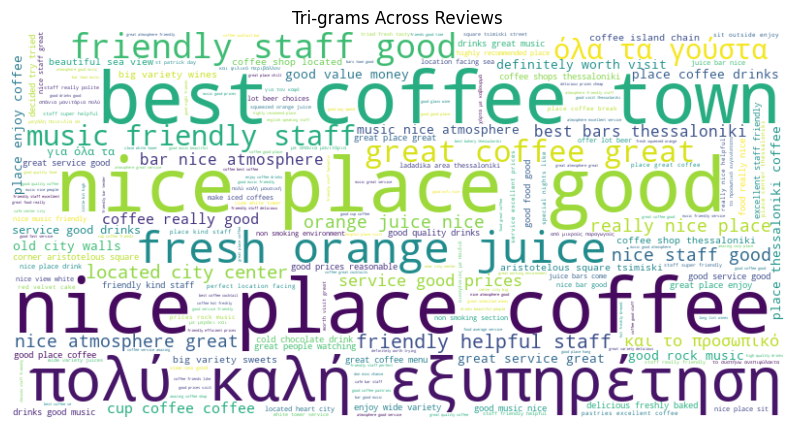

In [157]:
# Retrieve tri-grams frequency
trigram_vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3))
trigram_counts = trigram_vectorizer.fit_transform([all_reviews_text])
trigrams_words = trigram_vectorizer.get_feature_names_out()
trigram_counts = trigram_counts.toarray().squeeze()

# Create a dictionary consisting of a pair (tri-gram, frequency)
trigram_freq_dict = {}
for trigram, count in zip(trigrams_words, trigram_counts):
    trigram_text = ' '.join(trigram.split('_'))
    trigram_freq_dict[trigram_text] = count

makePlot(trigram_freq_dict, 'Tri-grams Across Reviews')

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def mostCommon1starVS5star(wordLength):
    five_star_reviews = df[df['Rating'] == 5]

    five_star_reviews_text = ' '.join(five_star_reviews['Review Text'])

    one_star_reviews = df[df['Rating'] == 1]

    one_star_reviews_text = ' '.join(one_star_reviews['Review Text'])

    count_vectorizer_five_star = CountVectorizer(stop_words='english', ngram_range=(wordLength, wordLength))
    word_counts_five_star = count_vectorizer_five_star.fit_transform([five_star_reviews_text])
    common_words_five_star = count_vectorizer_five_star.get_feature_names_out()
    word_counts_five_star = word_counts_five_star.toarray().squeeze()
    word_counts_df_five_star = pd.DataFrame({'Word': common_words_five_star, 'Count': word_counts_five_star})
    top_words_five_star = word_counts_df_five_star.nlargest(10, 'Count')

    count_vectorizer_one_star = CountVectorizer(stop_words='english', ngram_range=(wordLength, wordLength))
    word_counts_one_star = count_vectorizer_one_star.fit_transform([one_star_reviews_text])
    common_words_one_star = count_vectorizer_one_star.get_feature_names_out()
    word_counts_one_star = word_counts_one_star.toarray().squeeze()
    word_counts_df_one_star = pd.DataFrame({'Word': common_words_one_star, 'Count': word_counts_one_star})
    top_words_one_star = word_counts_df_one_star.nlargest(10, 'Count')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot for 5-star reviews
    ax1.bar(top_words_five_star['Word'], top_words_five_star['Count'], alpha=0.7)
    ax1.set_xlabel('Words')
    ax1.set_ylabel('Count')
    ax1.set_title('Most Common Words - 5-Star Reviews')
    ax1.set_xticklabels(top_words_five_star['Word'], rotation=45)

    # Plot for 1-star reviews
    ax2.bar(top_words_one_star['Word'], top_words_one_star['Count'], alpha=0.7)
    ax2.set_xlabel('Words')
    ax2.set_ylabel('Count')
    ax2.set_title('Most Common Words - 1-Star Reviews')
    ax2.set_xticklabels(top_words_one_star['Word'], rotation=45)

    plt.tight_layout()
    plt.show()


C:\Users\kyriaki.potamopoulou\AppData\Local\Temp\ipykernel_56444\2752676629.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_words_five_star['Word'], rotation=45)
C:\Users\kyriaki.potamopoulou\AppData\Local\Temp\ipykernel_56444\2752676629.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(top_words_one_star['Word'], rotation=45)


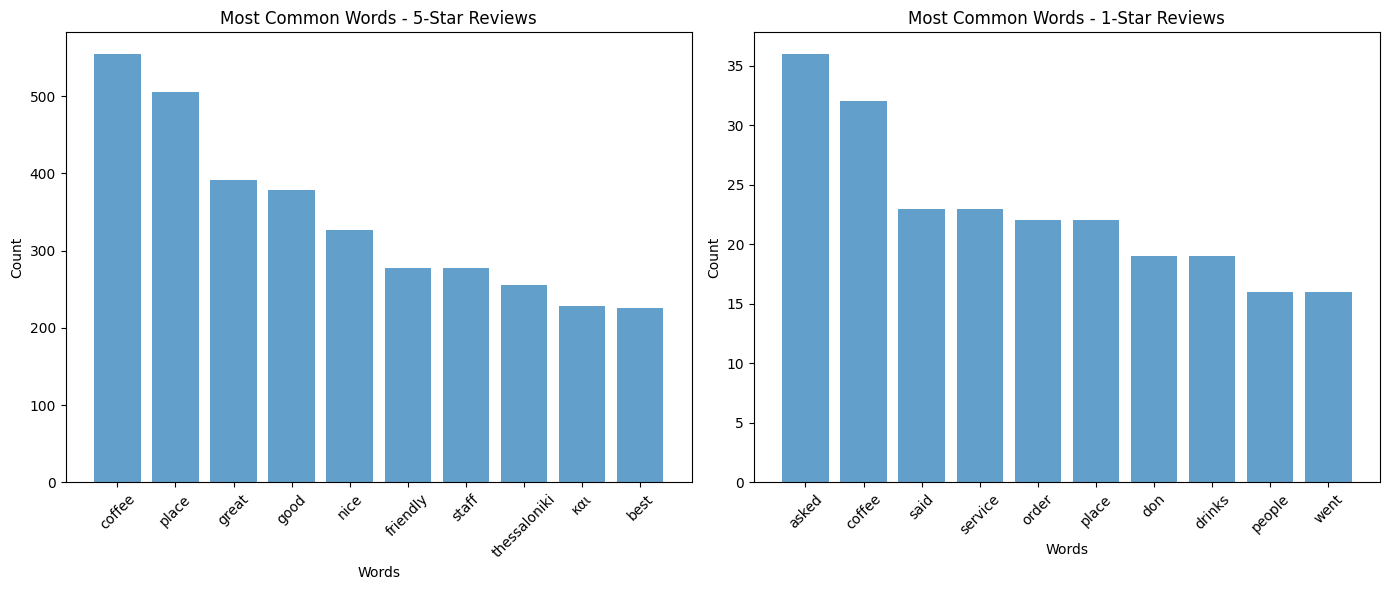

In [159]:
mostCommon1starVS5star(1)

C:\Users\kyriaki.potamopoulou\AppData\Local\Temp\ipykernel_56444\2752676629.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_words_five_star['Word'], rotation=45)
C:\Users\kyriaki.potamopoulou\AppData\Local\Temp\ipykernel_56444\2752676629.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(top_words_one_star['Word'], rotation=45)


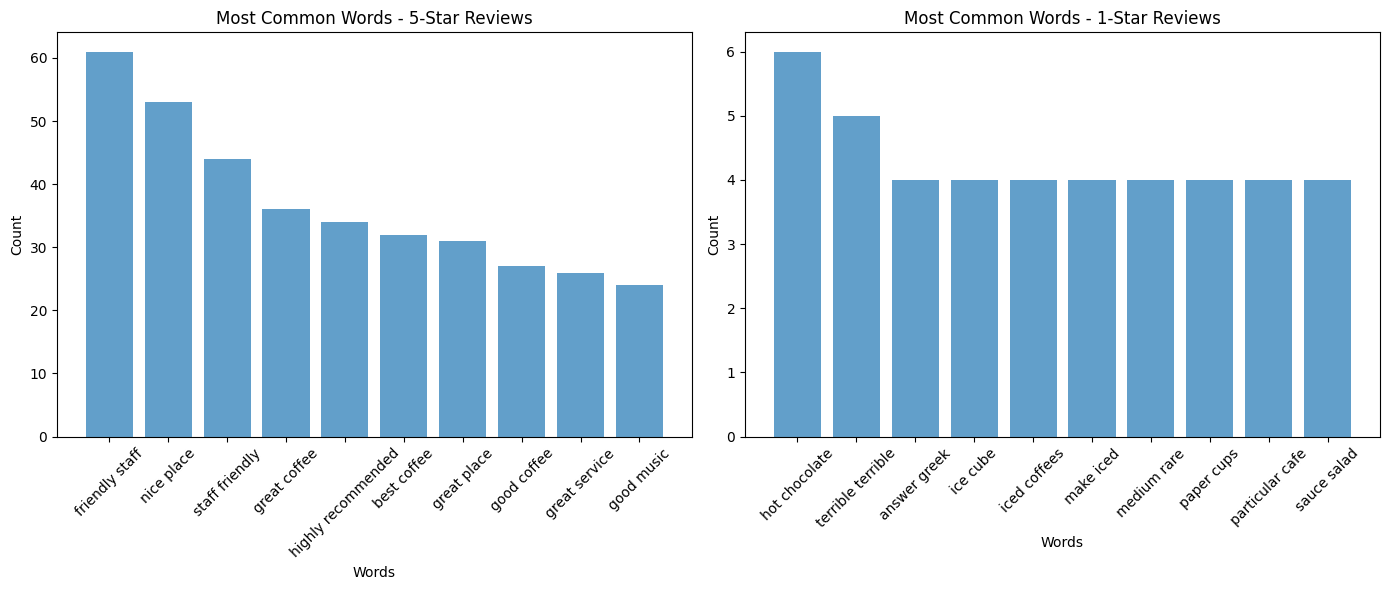

In [160]:
mostCommon1starVS5star(2)

C:\Users\kyriaki.potamopoulou\AppData\Local\Temp\ipykernel_56444\2752676629.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_words_five_star['Word'], rotation=45)
C:\Users\kyriaki.potamopoulou\AppData\Local\Temp\ipykernel_56444\2752676629.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(top_words_one_star['Word'], rotation=45)


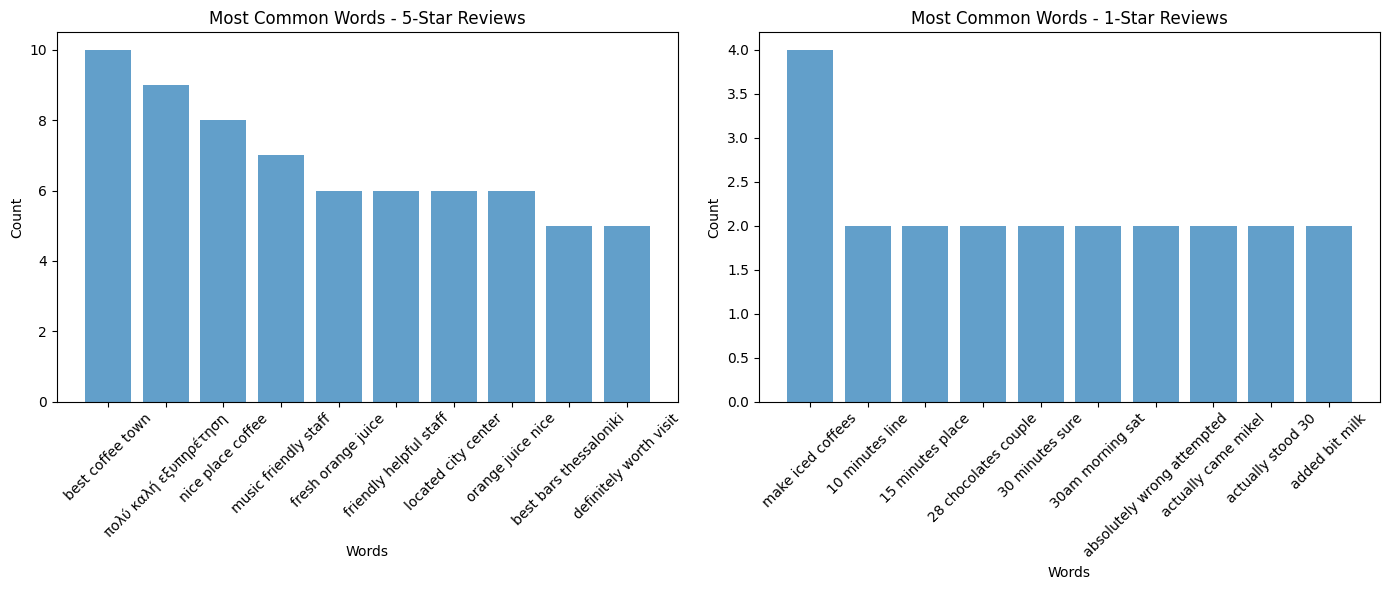

In [161]:
mostCommon1starVS5star(3)